In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

In [20]:
# Load the dataset
data_path = r'C:\Users\kowsh\PycharmProjects\NLP\data\ML471_S4_Datafile_Concept.csv'
df = pd.read_csv(data_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df[df["Datetime"].between('2014-01-01', '2022-01-01')]
df.set_index('Datetime', inplace=True)
df.head()

,Consumption,Festivals/Special_events,Power_Consumption_diff
Datetime,,,
2014-01-01,154.4880,8,5.1614
2014-02-01,142.3753,8,-12.1127
2014-03-01,134.1028,5,-8.2725
2014-04-01,124.3583,8,-9.7445
2014-05-01,125.0698,7,0.7115


In [21]:
# Seasonal Naïve Forecast
# Shift the Consumption values by 12 steps (one year for monthly data)
df['Seasonal_Naive_Forecast'] = df['Consumption'].shift(12)
# Display the tail to see predictions
df.tail()

,Consumption,Festivals/Special_events,Power_Consumption_diff,Seasonal_Naive_Forecast
Datetime,,,,
2020-09-01,133.6154,8,-10.3158,137.7637
2020-10-01,128.6137,6,-5.0017,126.4867
2020-11-01,132.3359,5,3.7222,127.8900
2020-12-01,149.7212,7,17.3853,147.7694
2021-01-01,164.4048,7,14.6836,149.8505


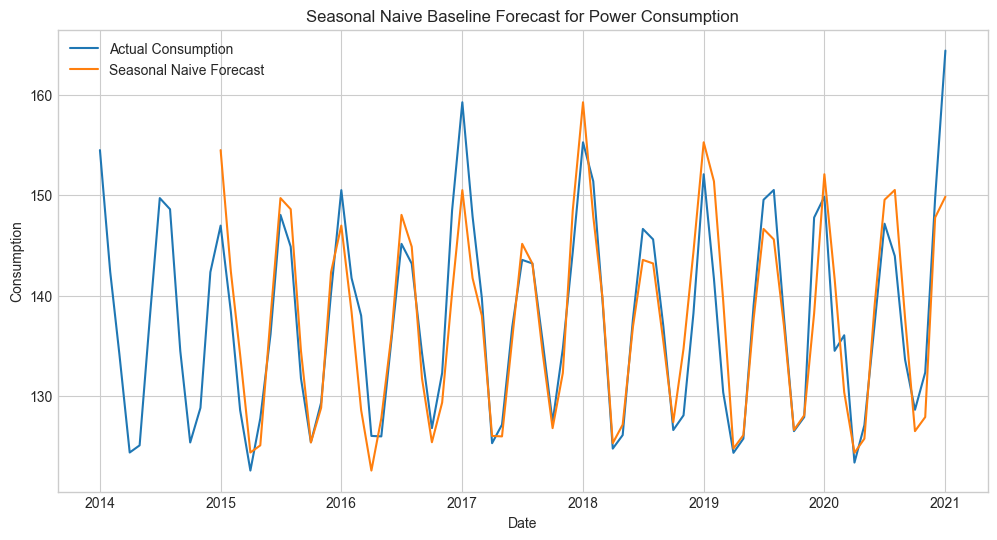

In [24]:
# Visualization and Comparison
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Actual Consumption', color='tab:blue')
plt.plot(df.index, df['Seasonal_Naive_Forecast'], label='Seasonal Naive Forecast', color='tab:orange')
plt.title('Seasonal Naive Baseline Forecast for Power Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [23]:
# Evaluation Using MAE
# Drop the initial NaNs created by shifting
evaluation_df = df.dropna(subset=['Seasonal_Naive_Forecast'])

mae = mean_absolute_error(evaluation_df['Consumption'], evaluation_df['Seasonal_Naive_Forecast'])
print(f"Seasonal Naive Baseline MAE: {mae:.4f}")

Seasonal Naive Baseline MAE: 3.2074
